In [20]:
%cd /content/drive/My Drive/Meo/Projects/Sentiment_analysis/sentiment_analysis_nal

/content/drive/My Drive/Meo/Projects/Sentiment_analysis/sentiment_analysis_nal


In [21]:
!pip install pyvi

In [22]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from pyvi import ViTokenizer
import re
from sklearn.feature_extraction.text import TfidfTransformer
from bs4 import BeautifulSoup
import pickle
import pickle

import string
import codecs

#Từ điển tích cực, tiêu cực, phủ định
path_nag = 'sentiment_dicts/nag.txt'
path_pos = 'sentiment_dicts/pos.txt'
path_not = 'sentiment_dicts/not.txt'
path_spos = 'sentiment_dicts/spos.txt'
path_snot = 'sentiment_dicts/snot.txt'

with codecs.open(path_nag, 'r', encoding='UTF-8') as f:
    nag = f.readlines()
nag_list = [n.replace('\n', '') for n in nag]

with codecs.open(path_pos, 'r', encoding='UTF-8') as f:
    pos = f.readlines()
pos_list = [n.replace('\n', '') for n in pos]
with codecs.open(path_not, 'r', encoding='UTF-8') as f:
    not_ = f.readlines()
not_list = [n.replace('\n', '') for n in not_]


with codecs.open(path_spos, 'r', encoding='UTF-8') as f:
    spos = f.readlines()
spos_list = [n.rstrip() for n in spos]

with codecs.open(path_snot, 'r', encoding='UTF-8') as f:
    snot_ = f.readlines()
snot_list = [n.rstrip() for n in snot_]


In [23]:
df_train = pd.read_csv('./train_1h_15.csv')
df_train

,text,label
0,cửa hàng phục vụ rất notpos sản phẩm rất kém ...,0
1,cua hang phuc vu rat notpos san pham rat kem ...,0
2,thời gian giao hàng rất nhanh giá rẻ mà giày c...,1
3,thoi gian giao hang rat nhanh gia re ma giay c...,1
4,đến quán lần do hôm ấy có voucher giảm giá đồ ...,0
...,...,...
123475,gon positive,1
123476,uy tín positive,1
123477,uy tin positive,1
123478,tin tưởng positive,1


In [24]:
df_train['text'][0]

'cửa hàng phục vụ rất notpos  sản phẩm rất kém nagative'

In [25]:
df_train[df_train.isna().any(axis=1)]

,text,label


In [ ]:
# df_train = df_train[df_train['text'].notna()]
# df_train.to_csv('train_1h_15.csv',index=False)

In [ ]:
from tqdm import *
def meow():
  new_data = []
  ith = 0
  for ele in tqdm(train_data):
    if ith%2 == 0:
        ele = ele.replace('positive', 'tốt')
        ele = ele.replace('nagative', 'xấu')
        ele = ele.replace('notpos', 'trung tính')
        
    else:
        ele = ele.replace('positive', 'tot')
        ele = ele.replace('nagative', 'xau')
        ele = ele.replace('notpos', 'trung tinh')
    ith += 1
    new_data.append(ele)
    print(new_data)
  



In [26]:
train_data = df_train['text'].tolist()
train_label = df_train['label'].tolist()

In [27]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer


In [28]:

X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=0)


In [33]:
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train[0:5000])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train[0:5000])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aba', 'abc', 'about', 'absolute', 'ac', 'ace', 'achae', 'achi', 'acoustic']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (5000, 7330)
the number of unique words  7330


In [31]:
from sklearn.manifold import TSNE
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


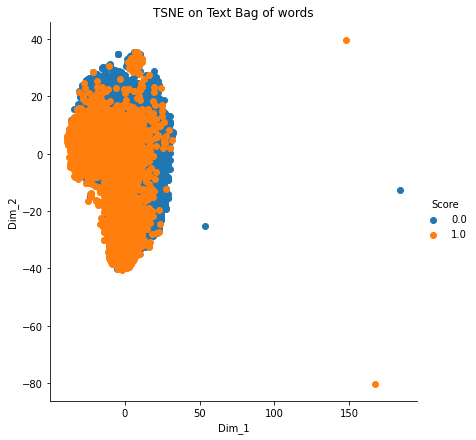

In [34]:
score=y_train[0:5000]
final_counts=final_counts.todense()
#here score 0 means negative review and 1 means positive review
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(final_counts)
tsne_data = np.vstack((tsne_data.T, score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE on Text Bag of words')
plt.show()

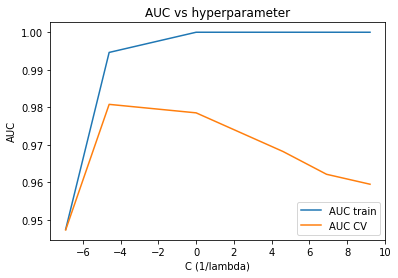

optimal lambda for which auc is maximum :  99.0


In [ ]:


# C = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]#C=1/lambda
# auc_train=[]
# auc_cv=[]
# for c in C:
#     lr=LogisticRegression(penalty='l1',C=c,solver='liblinear')
#     lr.fit(X_train_tf,y_train)
#     probcv=lr.predict_proba(X_cv_tf)[:,1]
#     auc_cv.append(roc_auc_score(y_cv,probcv))
#     probtr=lr.predict_proba(X_train_tf)[:,1]
#     auc_train.append(roc_auc_score(y_train,probtr))
# optimal_c= C[auc_cv.index(max(auc_cv))]
# C=[math.log(x) for x in C]#converting values of C into logarithm
# fig = plt.figure()
# ax = plt.subplot(111)
# ax.plot(C, auc_train, label='AUC train')
# ax.plot(C, auc_cv, label='AUC CV')
# plt.title('AUC vs hyperparameter')
# plt.xlabel('C (1/lambda)')
# plt.ylabel('AUC')
# ax.legend()
# plt.show()
# print('optimal lambda for which auc is maximum : ',1//optimal_c)

# LOG Modellllllllllllllllll



In [17]:
#ROC for lambda=99

stop_ws = (u'rằng',u'thì',u'là',u'mà')
steps = []
optimal_c = 10**-2
steps.append(('TfidVectorizer', TfidfVectorizer(ngram_range=(1,5), stop_words=stop_ws,max_df=0.5,min_df=10)))
steps.append(('StandardScaler',StandardScaler(with_mean=False)))
steps.append(('classifier', LogisticRegression(penalty='l1',C=optimal_c,solver='liblinear')))
lr = Pipeline(steps)
#lr=LogisticRegression(penalty='l1',C=optimal_c,solver='liblinear')
lr.fit(X_train,y_train)

classifier_filename_exp = 'logistic_train_1h_15.pkl'
with open(classifier_filename_exp, 'wb') as outfile:
          pickle.dump(lr, outfile)
print('Saved classifier model to file "%s"' % classifier_filename_exp)

Saved classifier model to file "logistic_train_1h_15.pkl"


<Figure size 432x288 with 0 Axes>

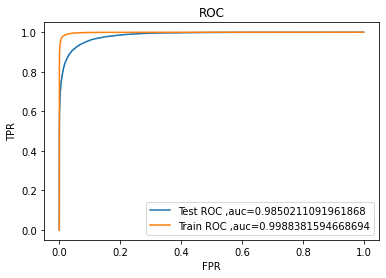

In [19]:
predi=lr.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=lr.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

In [ ]:
classifier_filename_exp = 'logistic_train_1h_15.pkl'
with open(classifier_filename_exp, 'wb') as outfile:
          pickle.dump(lr, outfile)
print('Saved classifier model to file "%s"' % classifier_filename_exp)

Saved classifier model to file "logistic_train_1h_15.pkl"


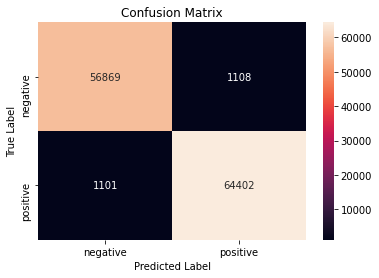

In [ ]:
#Confusion matrix using heatmap for test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
predic=lr.predict(X_test)
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM modellllllllllllllllllllllllllllllllllllllllllllllll


In [ ]:
def model(X_train,y_train,X_val,y_val,filename = 'train_val_model.pkl'):
  #Try some models
  classifiers = [
              # MultinomialNB(),
              # DecisionTreeClassifier(),
              # LogisticRegression(),
              # SGDClassifier(),
              LinearSVC(fit_intercept = True,multi_class='crammer_singer', C=1),
          ]
  stop_ws = (u'rằng',u'thì',u'là',u'mà')

  for classifier in classifiers:
      steps = []
      steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,5),stop_words=stop_ws,max_df=0.5, min_df=5)))
      steps.append(('tfidf', TfidfTransformer(use_idf=False, sublinear_tf = True,norm='l2',smooth_idf=True)))
      steps.append(('classifier', classifier))
      clf = Pipeline(steps)
      clf.fit(X_train, y_train)
      y_train_pred = clf.predict(X_train)
      report = metrics.classification_report(y_train, y_train_pred, labels=[1,0], digits=3)
      y_val_pred = clf.predict(X_val)
      report1 = metrics.classification_report(y_val, y_val_pred, labels=[1,0], digits=3)
      classifier_filename_exp = filename
      with open(classifier_filename_exp, 'wb') as outfile:
          pickle.dump(clf, outfile)
      print('Saved classifier model to file "%s"' % classifier_filename_exp)
  return report,report1,y_train_pred,y_val_pred,clf
report_train,report_val,y_train_pred,y_val_pred,model = model(X_train,y_train,X_val,y_val,'train_val_model_12_15.pkl')
print(report_train)
print(report_val)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Saved classifier model to file "train_val_model_12_15.pkl"
              precision    recall  f1-score   support

           1      0.993     0.993     0.993     52325
           0      0.992     0.992     0.992     46459

    accuracy                          0.992     98784
   macro avg      0.992     0.992     0.992     98784
weighted avg      0.992     0.992     0.992     98784

              precision    recall  f1-score   support

           1      0.949     0.948     0.949     13178
           0      0.940     0.942     0.941     11518

    accuracy                          0.945     24696
   macro avg      0.945     0.945     0.945     24696
weighted avg      0.945     0.945     0.945     24696



In [ ]:
"""
 precision    recall  f1-score   support

           1      0.994     0.994     0.994     52325
           0      0.993     0.993     0.993     46459

    accuracy                          0.994     98784
   macro avg      0.994     0.994     0.994     98784
weighted avg      0.994     0.994     0.994     98784

precision    recall  f1-score   support

           1      0.949     0.948     0.949     13178
           0      0.941     0.942     0.941     11518

    accuracy                          0.945     24696
   macro avg      0.945     0.945     0.945     24696
weighted avg      0.945     0.945     0.945     24696

"""

In [ ]:
print(report)

              precision    recall  f1-score   support

           1      0.996     0.996     0.996     65503
           0      0.995     0.995     0.995     57977

    accuracy                          0.996    123480
   macro avg      0.996     0.996     0.996    123480
weighted avg      0.996     0.996     0.996    123480



In [ ]:
ith = 0
for x, y1, y2 in zip(X_val, y_val, y_pred):
    if y1 != y2:
       # print(ith,x, y1, y2)
    # if ith==150:
    #   break
        # CHECK EACH WRONG SAMPLE POSSITIVE/NAGATIVE
        if y1!=1:#0:
            print(ith,x, y1, y2)
            # isTrue = False
            # for pos in not_list:
            #     if pos in x:
            #         isTrue = True
            # if isTrue:
            #     train_label[ith] = y2
            #     print(ith,x, y1, y2)
            #train_label[ith] = y2
            # if 'nagative' in x : 
            # #:
            #       print(ith,x, y1, y2)
                  #train_label[ith] = y2
            #       isTrue = False
            #       for pos in snot_list:
            #         if pos in x:
            #           isTrue = True
            #       if isTrue:
            #         #train_label[ith] = y2
            #         print(ith,x, y1, y2)
    ith += 1

11 ban nhan vien sieu de thuong ca bac bao ve cung vay nhiet tinh ghe luon y khong gian quan cung tam chi bi cai la kem ngot qua the an xong ngan toi co luon y cha the an het duoc positive positive nagative nagative positive 0 1
28 minh chi moi an mon la banh bong lan trung muoi voi tra sua lai thou banh bong lan trung muoi la mon minh th gi x nhut lun banh thi mem toi xop lam an chung voi trung muoi nua la nhut lun con tra sua lai thi minh dat hang ful thach do lun voi them gi ely pho mai nua cai nay thi ngon lun pho mai cung vua du de thay beo beo con gi ely thi nghe mui la dua thom thom nghe ban minh qua ng cao tra lai thom lam ma sao minh uong thi notnag nghe  tran chau thi hoi cung noi chung la kha hai long positive positive nagative positive 0 1
44 hàng chưa dùng nổi lần 0 1
53 cua hang giao lon mau hoi khong vui xiu nhung chat luong van nagative positive 0 1
90 đang dùng chép dữ liêu khoảng s 0 1
162 khong gian thi thoai mai trang tri dep cung cach phuc vu cua nhan vien voi khac

In [ ]:
def normalize_text(text):

    #Remove các ký tự kéo dài: vd: đẹppppppp
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)

    # Chuyển thành chữ thường
    text = text.lower()

    #Chuẩn hóa tiếng Việt, xử lý emoj, chuẩn hóa tiếng Anh, thuật ngữ
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
        "👹": "nagative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
        "💄": "positive", "💎": "positive", "💩": "positive","😕": "nagative", "😱": "nagative", "😸": "positive",
        "😾": "nagative", "🚫": "nagative",  "🤬": "nagative","🧚": "positive", "🧡": "positive",'🐶':' positive ',
        '👎': ' nagative ', '😣': ' nagative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' nagative ', '😢': ' nagative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' nagative ', '😊': ' positive ',
        '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' nagative ', '😭': ' nagative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' nagative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' nagative ', '😀': ' positive ', ':((': ' nagative ', '😡': ' nagative ', '😠': ' nagative ',
        '😒': ' nagative ', '🙂': ' positive ', '😏': ' nagative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' nagative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' nagative ', '😓': ' nagative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
        '💓': ' positive ', '😐': ' nagative ', ':3': ' positive ', '😫': ' nagative ', '😥': ' nagative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' nagative ', '😑': ' nagative ', '🔥': ' nagative ', '🙏': ' nagative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' nagative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
        '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' nagative ',  '💀': ' nagative ',
        '😔': ' nagative ', '😧': ' nagative ', '😩': ' nagative ', '😰': ' nagative ', '😳': ' nagative ',
        '😵': ' nagative ', '😶': ' nagative ', '🙁': ' nagative ',
        #Chuẩn hóa 1 số sentiment words/English words
        ':))': '  positive ', ':)': ' positive ', 'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ','ko': u'không',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
        ' lol ': ' nagative ',' cc ': ' nagative ','cute': u' dễ thương ','huhu': ' nagative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ',
        ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
        #dưới 3* quy về 1*, trên 3* quy về 5*
        '6 sao': ' 5star ','6 star': ' 5star ', '5star': ' 5star ','5 sao': ' 5star ','5sao': ' 5star ',
        'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ','2 sao':' 1star ','2sao':' 1star ','1 star': '1star',
        '2 starstar':' 1star ','1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star ',}

    for k, v in replace_list.items():
        text = text.replace(k, v)

    # chuyen punctuation thành space
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)
    text = re.sub(r"http\S+", "", text)
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub("\S*\d\S*", "", text).strip()

    

    """
    str =  " Thời gian giao hàng rất nhanh giá rẻ mà giày cực chất! Êm chân lắm.thanks shop nhiều" 
    text = ViTokenizer.tokenize(str) "Thời_gian giao hàng rất nhanh giá rẻ mà giày cực chất ! Êm chân lắm . thanks shop nhiều" 
    texts = text.split() ['Thời_gian', 'giao', 'hàng', 'rất', 'nhanh', 'giá', 'rẻ', 'mà', 'giày', 'cực', 'chất', '!', 'Êm', 'chân', 'lắm', '.', 'thanks', 'shop', 'nhiều']
    texts = [t.replace('_', ' ') for t in texts] ['Thời gian', 'giao', 'hàng', 'rất', 'nhanh', 'giá', 'rẻ', 'mà', 'giày', 'cực', 'chất', '!', 'Êm', 'chân', 'lắm', '.', 'thanks', 'shop', 'nhiều']
    """
    text = ViTokenizer.tokenize(text) 
    texts = text.split()
    len_text = len(texts)

    texts = [t.replace('_', ' ') for t in texts]
    for i in range(len_text):
        cp_text = texts[i]
        if cp_text in not_list: # Xử lý vấn đề phủ định (VD: áo này chẳng đẹp--> áo này notpos)
            numb_word = 2 if len_text - i - 1 >= 4 else len_text - i - 1

            for j in range(numb_word):
                if texts[i + j + 1] in pos_list:
                    texts[i] = 'notpos'
                    texts[i + j + 1] = ''

                if texts[i + j + 1] in nag_list:
                    texts[i] = 'notnag'
                    texts[i + j + 1] = ''
        else: #Thêm feature cho những sentiment words (áo này đẹp--> áo này đẹp positive)
            if cp_text in pos_list:
                texts.append('positive')
            elif cp_text in nag_list:
                texts.append('nagative')

    text = u' '.join(texts)

    #remove nốt những ký tự thừa thãi
    text = text.replace(u'"', u' ')
    text = text.replace(u'️', u'')
    text = text.replace('🏻','')
    for pos in spos_list:
      if pos in text:
        text += " " + 'positive'
    for snot in snot_list:
      if snot in text:
        text += " " + 'nagative'
    return text

In [ ]:
x = """
Giao thiếu nước tẩy trang. Liên hệ nhưng không ai giải quyết cho. Yêu cầu shop hỗ trợ trường hợp này
"""
nor = normalize_text(x)
nor

'giao thiếu nước tẩy trang liên hệ nhưng không ai giải quyết cho yêu cầu cửa hàng hỗ trợ trường hợp này nagative'

In [ ]:
y_train_pre = model.predict(X_train)
report1 = metrics.classification_report(y_train, y_train_pre, labels=[1,0], digits=3)
print(report1)

              precision    recall  f1-score   support

           1      0.994     0.994     0.994     52325
           0      0.993     0.993     0.993     46459

    accuracy                          0.994     98784
   macro avg      0.994     0.994     0.994     98784
weighted avg      0.994     0.994     0.994     98784



In [ ]:
from random import randint

In [ ]:
n = randint(0,len(y_val))
def out(x,y):
  print(x)
  pre = model.predict([x])[0]
  print(pre)
  x = 'positive' if pre == 1 else 'negative'
  print("*"*50)
  print(x)
  
out(nor,y_val[n])

giao thiếu nước tẩy trang liên hệ nhưng không ai giải quyết cho yêu cầu cửa hàng hỗ trợ trường hợp này nagative
0
**************************************************
negative


In [ ]:
 x = 'positive' if 1 == 1 else 'negative'
 x

'positive'

In [ ]:
"""
           1      0.995     0.994     0.994     65600
           0      0.993     0.994     0.994     57880

    accuracy                          0.994    123480
   macro avg      0.994     0.994     0.994    123480
weighted avg      0.994     0.994     0.994    123480
"""

'\n           1      0.995     0.994     0.994     65600\n           0      0.993     0.994     0.994     57880\n\n    accuracy                          0.994    123480\n   macro avg      0.994     0.994     0.994    123480\nweighted avg      0.994     0.994     0.994    123480\n'

In [ ]:
df_test = pd.read_csv('test_1h_15.csv')
df_test

,text,label
0,hum nay mình cùng người yêu đến quán mặc dù là...,1
1,công nhận lần đầu vào quán trà sữa kiều nì luô...,0
2,mình và bạn cùng ăn phần đặc biệt và thường lo...,0
3,chất lượng chưa dùng thử chưa biết nhưng nhìn ...,1
4,đồ ăn ở quán này rất lạ có nhiều món đặc sản k...,1
...,...,...
15322,thời gian giao hàng chậm đóng gói sản phẩm kém...,0
15323,đi đi lần lần mua về lần ngồi uống view tạm,0
15324,chất lượng sản phẩm tuyệt vời đóng gói sản phẩ...,1
15325,mình đặt màu ghi giao màu đỏ mình nhắn tin hỏi...,0


In [ ]:
df_test = df_test[df_test['text'].notna()]

In [ ]:
df_test

,text,label
0,hum nay mình cùng người yêu đến quán mặc dù là...,1
1,công nhận lần đầu vào quán trà sữa kiều nì luô...,0
2,mình và bạn cùng ăn phần đặc biệt và thường lo...,0
3,chất lượng chưa dùng thử chưa biết nhưng nhìn ...,1
4,đồ ăn ở quán này rất lạ có nhiều món đặc sản k...,1
...,...,...
15322,thời gian giao hàng chậm đóng gói sản phẩm kém...,0
15323,đi đi lần lần mua về lần ngồi uống view tạm,0
15324,chất lượng sản phẩm tuyệt vời đóng gói sản phẩ...,1
15325,mình đặt màu ghi giao màu đỏ mình nhắn tin hỏi...,0


In [ ]:
df_test.to_csv('test_1h_15.csv',index=False)
df_test = pd.read_csv('test_1h_15.csv')
df_test[df_test.isna().any(axis=1)]

,text,label


In [ ]:
test_data = df_test['text'].tolist()
test_label = df_test['label'].tolist()

In [ ]:
test_data

[nan]

In [ ]:
classifier_filename_exp = 'sentimentmodel.pkl'
with open(classifier_filename_exp, 'rb') as infile:
      model = pickle.load(infile)

In [ ]:
y_test_pred = model.predict(test_data)

In [ ]:
report1 = metrics.classification_report(test_label, y_test_pred, labels=[1,0], digits=3)
print(report1)

              precision    recall  f1-score   support

           1      0.842     0.863     0.852      7882
           0      0.851     0.828     0.840      7444

    accuracy                          0.846     15326
   macro avg      0.847     0.846     0.846     15326
weighted avg      0.846     0.846     0.846     15326



In [ ]:
# d = {'text':train_data,'label':train_label}
# df = pd.DataFrame(data=d)
# df.to_csv('train_1h_15.csv',index=False)


In [ ]:
def check(data,label,y_pred):
  ith = 0
  for x, y1, y2 in zip(data, label, y_pred):
      if y1 != y2:
          # CHECK EACH WRONG SAMPLE POSSITIVE/NAGATIVE
          if y1!=1:#0:
              #train_label[ith] = y2
              if 'positive' in x:
                print(ith,x, y1, y2)
      ith += 1
check(train_data,train_label,y_pred)

2727 banh ngon lam nhung het som nhiu luc muon mua ve an nhiu nhung quan lai khong du banh ban minh thich an banh tra xanh o day phuc vu nhiet tinh minh se som quay lai positive positive positive 0 1
3200 sáng đầu tuần trong xanh em đang lim dim mơ được ofline thịt nướng trong hang sơn đòong thì điện thoại rung như bom nổ hoảng hồn tưởng is đánh tới chân cầu rồng rồi chứ lật đật mở máy ra xem hoá ra con bé quen hôm tô tượng ở trần hưng đạo yong se oh tôi nghe đây anh mèo à đang làm gì đấy ra lote gặm chân gà với em hem anh đang nghiên cứu tềnh hình hạt nhân trên bán đảo triều tiên nhưng người đẹp đã gọi thì có đến hoà bình thế giới anh cũng bỏ đấy đã à hay chúng mình đi chỗ nào giản dị hơn đi chứ anh không quen nơi sang trọng thế bao giờ thế là bằng biện pháp nghiệp vụ em lai dắt con hâm về ăn mì quả ng đồng quê mới đọc review chứ thóc đâu mà đãi gà rừng mãi được ⌒ ｏ ⌒ vào quán thì cảm nhận đầu tiên là ruồi ruồi ở khắp mọi nơi nói không phải mê tín chứ từ bé tới giờ em chưa thấy quán ă